In [22]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.3 MB/s 
     |████████████████████████████████| 930 kB 55.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/RodrigoAcev/OBESITY_LEVELS/master/data/ObesityDataSet_raw_and_data_sinthetic.csv')

# Imputando los datos nulos

No hay datos nulos.

# Convirtiendo los datos categoricos a numéricos

In [25]:
df_info = pd.concat([df_raw.nunique(),df_raw.dtypes],axis=1)
df_info.rename(columns={0:'valoresUnicos',
                       1:'tipoVariable'},
              inplace=True)
df_info['muestras'] = df_raw.count()
cat_cols = df_info.loc[df_info['tipoVariable']=='object'].index
num_cols = df_info.loc[df_info['tipoVariable']=='float64'].index
cat_cols, num_cols

(Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
        'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
       dtype='object'),
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object'))

In [26]:
df_raw_num=df_raw.copy()
df_raw_num['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
df_raw_num['family_history_with_overweight'].replace(['no', 'yes'], [0, 1], inplace=True)
df_raw_num['FAVC'].replace(['no', 'yes'], [0, 1], inplace=True)
df_raw_num['CAEC'].replace(['no', 'Sometimes', 'Frequently', 'Always'], [0, 1, 2, 3], inplace=True)
df_raw_num['SMOKE'].replace(['no', 'yes'], [0, 1], inplace=True)
df_raw_num['SCC'].replace(['no', 'yes'], [0, 1], inplace=True)
df_raw_num['CALC'].replace(['no', 'Sometimes', 'Frequently', 'Always'], [0, 1, 2, 3], inplace=True)
df_raw_num['MTRANS'].replace(['Automobile','Motorbike','Bike','Public_Transportation','Walking'], [4, 3, 1, 2,0], inplace=True)
df_raw_num['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                          'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], [-1, 0, 1, 2, 3, 4, 5], inplace=True)
df_raw_num

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,2,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,2,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,2,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,2,5
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,2,5
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,2,5
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,2,5


# Normalizando datos

In [27]:
X_raw_num = df_raw_num.drop('NObeyesdad', axis=1).copy()
y_raw_num = df_raw_num['NObeyesdad'].copy()

from sklearn.preprocessing import scale

X_raw_num_norm = scale(X_raw_num)


# Dividiendo en datos de entrenamiento y prueba


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_raw_num, y_raw_num, test_size=0.2, stratify=y_raw_num, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_raw_num_norm, y_raw_num, test_size=0.2, stratify=y_raw_num, random_state=42)

# Modelo SVM


In [29]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import roc_auc_score

Cs = np.logspace(-2,2,9)  
gammas = np.logspace(-4,4,9)  
kernel=['linear','poly','rbf','sigmoid']

mejor_modelo = None
mejor_score = 0
for ker in kernel:
    for C in Cs:
        for gamma in gammas:
        
            SVC_model = SVC(kernel=ker, C=C, gamma=gamma, probability=True)
            SVC_model.fit(X_train_norm, y_train_norm)
            #score_val = model.score(X_test_norm, y_test_norm)
            score_val = roc_auc_score(y_test_norm, SVC_model.predict_proba(X_test_norm), multi_class='ovr')
            if score_val > mejor_score:
                mejor_score = score_val
                mejor_modelo = SVC_model


print ('Mejor valor de C: %0.4f' % mejor_modelo.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_modelo.get_params()['gamma'])
print ('Mejor kernel: %s' % mejor_modelo.get_params()['kernel'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, mejor_modelo.predict_proba(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, mejor_modelo.predict_proba(X_test_norm), multi_class='ovr'))

Mejor valor de C: 100.0000
Mejor valor de gamma: 10000.0000
Mejor kernel: linear
Exactitud en el conjunto de entrenamiento: 0.9990
Exactitud en el conjunto de validación: 0.9984


# Modelo Random Forest


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
params_dict = {'n_estimators':np.arange(20,801,50),
            'max_depth': np.arange(3,16)}
rf_model = RandomForestClassifier(max_features='sqrt', #n_estimators= 21, max_depth=15, max_features='sqrt', 
                                  class_weight="balanced", oob_score=True)
random_cv = RandomizedSearchCV(rf_model, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv.fit(X_train_norm, y_train_norm)
random_cv.best_params_

{'max_depth': 12, 'n_estimators': 220}

In [31]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, random_cv.best_estimator_.predict_proba(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, random_cv.best_estimator_.predict_proba(X_test_norm), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 0.9961


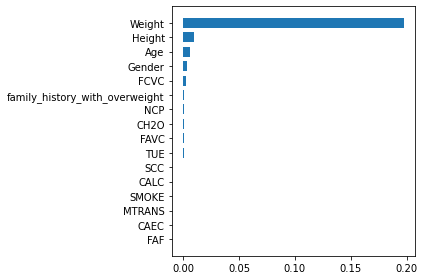

In [33]:
#Implementation modified from https://github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py#L284
def custom_permutation_importance(random_forest, x, y):
  baseline =  roc_auc_score(y, random_forest.predict_proba(x), multi_class='ovr')
  x_copy = x.copy()
  importances = []
  for col in x_copy.columns:
      save = x_copy[col].copy()
      x_copy[col] = np.random.permutation(x_copy[col])
      m = roc_auc_score(y, random_forest.predict_proba(x_copy), multi_class='ovr')
      x_copy[col] = save
      importances.append(baseline - m)
  importances = np.array(importances)

  I = pd.DataFrame(data={"names": x.columns, "importances": importances})
  I = I.sort_values("importances", ascending=True)

  return I
X_test_norm_df=pd.DataFrame(X_test_norm,columns=X_raw_num.columns)

importances = custom_permutation_importance(random_cv.best_estimator_, X_test_norm_df, y_test_norm)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

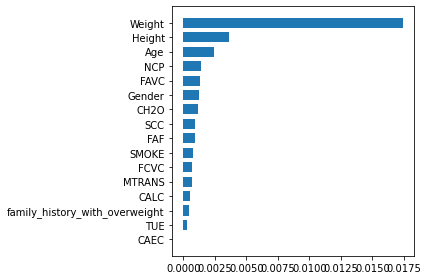

In [34]:
#Implementation modified from https://github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py#L292
from sklearn.base import clone
def custom_dropcol_importance(random_forest, x_train, y_train,x_test,y_test):
  random_forest_ = clone(random_forest)
  random_forest_.random_state = 999
  random_forest_.fit(x_train, y_train)
  baseline = roc_auc_score(y_test, random_forest_.predict_proba(x_test), multi_class='ovr')
  importances = []
  for col in x_train.columns:
      x_train_without_column = x_train.drop(col, axis=1)
      x_test_without_column = x_test.drop(col, axis=1)
      random_forest_ = clone(random_forest)
      random_forest_.random_state = 999
      random_forest_.fit(x_train_without_column, y_train)
      o = roc_auc_score(y_test, random_forest_.predict_proba(x_test_without_column), multi_class='ovr')
      importances.append(baseline - o)
  importances = np.array(importances)
  
  I = pd.DataFrame(data={"names": x_train.columns, "importances": importances})
  I = I.sort_values("importances", ascending=True)

  return I

X_train_norm_df=pd.DataFrame(X_train_norm,columns=X_raw_num.columns)
X_test_norm_df=pd.DataFrame(X_test_norm,columns=X_raw_num.columns)
importances = custom_dropcol_importance(random_cv.best_estimator_,X_train_norm_df, y_train_norm, X_test_norm_df, y_test_norm)
fig = plt.figure(figsize=(6, 4))
plt.barh(importances.names,
        importances.importances.values,
        height=0.7)
fig = fig.tight_layout()
plt.show()

CAEC es la variable de menor importancia. Es por ello que se va a probar un modelo sin esa variable.

In [99]:
X_train_norm2=np.delete(X_train_norm,8,axis=1)
X_test_norm2=np.delete(X_test_norm,8,axis=1)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
params_dict = {'n_estimators':np.arange(20,801,50),
            'max_depth': np.arange(3,16)}
rf_model2 = RandomForestClassifier(max_features='sqrt', #n_estimators= 21, max_depth=15, max_features='sqrt', 
                                  class_weight="balanced", oob_score=True)
random_cv2 = RandomizedSearchCV(rf_model2, 
                               params_dict, 
                               scoring='f1_macro', 
                               cv=10, 
                               n_iter=10,
                               n_jobs=-1,
                               random_state=42)
random_cv2.fit(X_train_norm2, y_train_norm)
random_cv2.best_params_

{'max_depth': 13, 'n_estimators': 320}

In [101]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, random_cv2.best_estimator_.predict_proba(X_train_norm2), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, random_cv2.best_estimator_.predict_proba(X_test_norm2), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 0.9961


# Modelo Red Neuronal

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
MLP_model = MLPClassifier(random_state=1, max_iter=1000)
MLP_random_cv = GridSearchCV(MLP_model, parameter_space, n_jobs=-1, cv=3)
MLP_random_cv.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [37]:
MLP_random_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [38]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, MLP_random_cv.best_estimator_.predict_proba(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, MLP_random_cv.best_estimator_.predict_proba(X_test_norm), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 0.9976


# Modelo Red Neuronal Convolucional

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Dropout
from sklearn.metrics import roc_auc_score
from keras import metrics
convmodel=Sequential()
convmodel.add(Conv1D(128,3,activation='relu',input_shape=(16,1)))
convmodel.add(MaxPooling1D(2))
convmodel.add(Conv1D(128, 3, activation='relu'))
convmodel.add(MaxPooling1D(2))
convmodel.add(Flatten())
convmodel.add(Dense(7,activation='sigmoid'))
convmodel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=[metrics.AUC(name='my_auc')])
convmodel.summary()
y_train_norm_HE_df=pd.get_dummies(pd.DataFrame(y_train_norm).astype(str),prefix='y')
y_test_norm_HE_df=pd.get_dummies(pd.DataFrame(y_test_norm).astype(str),prefix='y')
x = np.expand_dims(X_train_norm, axis=2)
y = np.expand_dims(y_train_norm_HE_df, axis=1)  
x_t = np.expand_dims(X_test_norm, axis=2)
y_t = np.expand_dims(y_test_norm_HE_df, axis=1)
convmodel.fit(x,y_train_norm_HE_df,epochs=100,validation_data=(x_t, y_test_norm_HE_df))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 14, 128)           512       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 128)            49280     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                

0.96276304344223

In [41]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm_HE_df, convmodel.predict(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm_HE_df, convmodel.predict(X_test_norm), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 0.9785
Exactitud en el conjunto de validación: 0.9628


# Modelo de votación

In [44]:
#Modificado de https://machinelearningmastery.com/voting-ensembles-with-python/
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
models = list()
models.append(('svm', SVC(kernel='linear', C=100, gamma=10000, probability=True)))
models.append(('rf', RandomForestClassifier(n_estimators= 220, max_depth=12, max_features='sqrt', class_weight="balanced", oob_score=True)))
models.append(('mlp', MLPClassifier(activation='tanh',alpha=0.05,hidden_layer_sizes=(50,100,50),learning_rate='constant',solver='adam',random_state=1, max_iter=1000)))
voting_model = VotingClassifier(estimators=models, voting='soft')
voting_model.fit(X_train_norm, y_train_norm)

VotingClassifier(estimators=[('svm',
                              SVC(C=100, gamma=10000, kernel='linear',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=12,
                                                     max_features='sqrt',
                                                     n_estimators=220,
                                                     oob_score=True)),
                             ('mlp',
                              MLPClassifier(activation='tanh', alpha=0.05,
                                            hidden_layer_sizes=(50, 100, 50),
                                            max_iter=1000, random_state=1))],
                 voting='soft')

In [46]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, voting_model.predict_proba(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, voting_model.predict_proba(X_test_norm), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 0.9993


# Modelo apilado

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegressionCV
models = list()
models.append(('svm', SVC(kernel='linear', C=100, gamma=10000, probability=True)))
models.append(('rf', RandomForestClassifier(n_estimators= 220, max_depth=12, max_features='sqrt', class_weight="balanced", oob_score=True)))
models.append(('mlp', MLPClassifier(activation='tanh',alpha=0.05,hidden_layer_sizes=(50,100,50),learning_rate='constant',solver='adam',random_state=1, max_iter=1000)))
meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators=models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
stacking_model.fit(X_train_norm, y_train_norm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.5s finished


StackingClassifier(cv=5,
                   estimators=[('svm',
                                SVC(C=100, gamma=10000, kernel='linear',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=12,
                                                       max_features='sqrt',
                                                       n_estimators=220,
                                                       oob_score=True)),
                               ('mlp',
                                MLPClassifier(activation='tanh', alpha=0.05,
                                              hidden_layer_sizes=(50, 100, 50),
                                              max_iter=1000, random_state=1))],
                   final_estimator=LogisticRegressionCV(), passthrough=True,
                   verbose=2)

In [49]:
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % roc_auc_score(y_train_norm, stacking_model.predict_proba(X_train_norm), multi_class='ovr'))
print ('Exactitud en el conjunto de validación: %0.4f' % roc_auc_score(y_test_norm, stacking_model.predict_proba(X_test_norm), multi_class='ovr'))

Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 0.9990


# Compilación de resultados

In [50]:
class_dict = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6}

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
def GraficaCM(y_test, y_hat, class_dict):

    labels_classes = list(class_dict.keys())
    
    cm = confusion_matrix(y_test, y_hat)

    print(classification_report(y_test, y_hat, target_names=labels_classes))

    fig, axs = plt.subplots(figsize=(7,5))

    sns.heatmap(cm, annot=True, ax=axs, cmap='magma_r')

    axs.set_yticks(np.arange(len(labels_classes))+.5)
    axs.set_xticks(np.arange(len(labels_classes))+.5)

    axs.set_xticklabels(labels_classes, rotation=90)
    axs.set_yticklabels(labels_classes, rotation=0)

    axs.set_ylabel('Verdadero')
    axs.set_xlabel('Estimado')

    plt.show()

In [56]:
y_hat_svm = mejor_modelo.predict(X_test_norm)
y_hat_rf = random_cv.best_estimator_.predict(X_test_norm)
y_hat_mlp = MLP_random_cv.best_estimator_.predict(X_test_norm)
y_hat_cnn = convmodel.predict(X_test_norm)
y_hat_vot = voting_model.predict(X_test_norm)
y_hat_stack = stacking_model.predict(X_test_norm)

Matriz de confusión modelo SVM

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        54
      Normal_Weight       0.96      0.95      0.96        58
 Overweight_Level_I       0.98      0.88      0.93        58
Overweight_Level_II       0.92      0.97      0.94        58
     Obesity_Type_I       0.95      0.99      0.97        70
    Obesity_Type_II       0.97      0.98      0.98        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



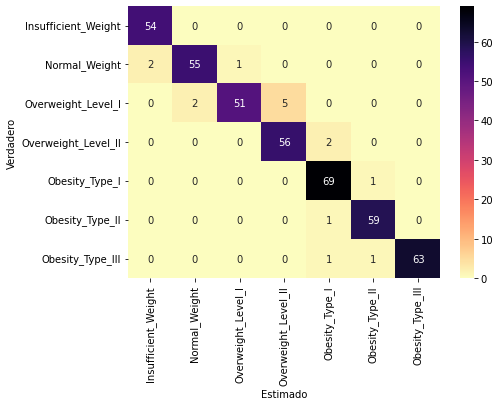

In [60]:
GraficaCM(y_test_norm, y_hat_svm, class_dict)

Matriz de confusión modelo Random Forest

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.81      0.95      0.87        58
 Overweight_Level_I       0.92      0.83      0.87        58
Overweight_Level_II       0.96      0.95      0.96        58
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



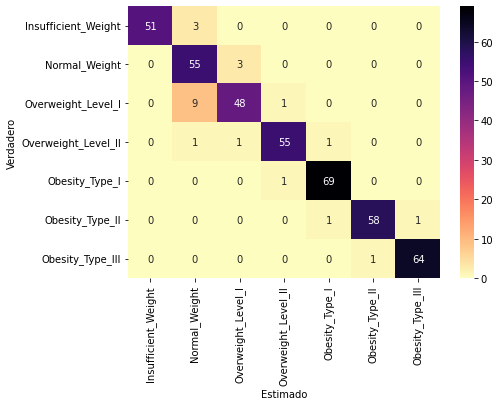

In [61]:
GraficaCM(y_test_norm, y_hat_rf, class_dict)

Matriz de confusión modelo MLP

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        54
      Normal_Weight       0.93      0.90      0.91        58
 Overweight_Level_I       0.91      0.88      0.89        58
Overweight_Level_II       0.93      0.98      0.96        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       0.98      0.95      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65

           accuracy                           0.96       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.96      0.95       423



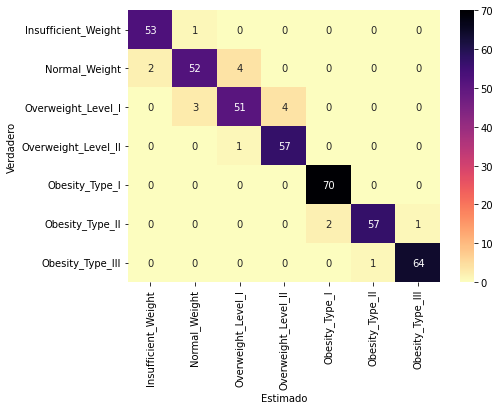

In [67]:
GraficaCM(y_test_norm, y_hat_mlp, class_dict)

Matriz de confusión modelo CNN

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.96        54
      Normal_Weight       0.88      0.91      0.90        58
 Overweight_Level_I       0.94      0.83      0.88        58
Overweight_Level_II       0.90      0.93      0.92        58
     Obesity_Type_I       0.93      0.97      0.95        70
    Obesity_Type_II       0.93      0.95      0.94        60
   Obesity_Type_III       1.00      0.95      0.98        65

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



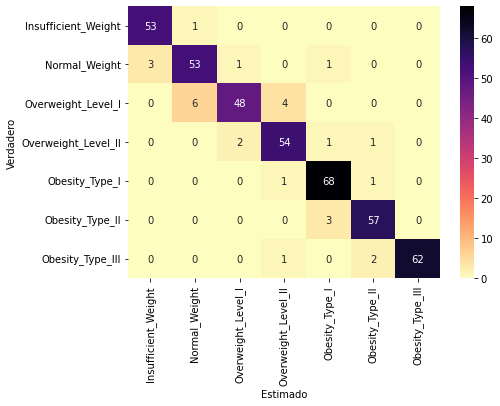

In [75]:
GraficaCM(y_test_norm, y_hat_cnn.argmax(1)-1, class_dict)

Matriz de confusión modelo de votación

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        54
      Normal_Weight       0.93      0.93      0.93        58
 Overweight_Level_I       0.93      0.90      0.91        58
Overweight_Level_II       0.95      0.98      0.97        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



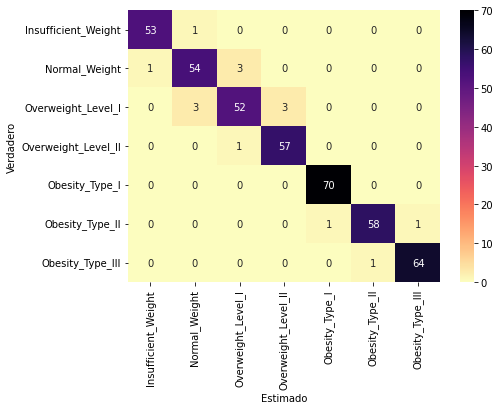

In [64]:
GraficaCM(y_test_norm, y_hat_vot, class_dict)

Matriz de confusión modelo apilado

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        54
      Normal_Weight       0.92      0.97      0.94        58
 Overweight_Level_I       0.96      0.88      0.92        58
Overweight_Level_II       0.95      0.98      0.97        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       0.98      0.97      0.97        60
   Obesity_Type_III       0.98      0.98      0.98        65

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



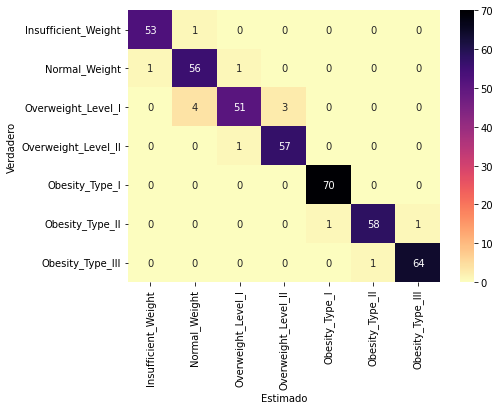

In [65]:
GraficaCM(y_test_norm, y_hat_stack, class_dict)

In [94]:
from sklearn.metrics import precision_score, f1_score, recall_score

#Precision:
from sklearn.metrics import precision_score, f1_score, recall_score
svm_pre = precision_score(y_test_norm, y_hat_svm, average='macro')
rf_pre = precision_score(y_test_norm, y_hat_rf, average='macro')
mlp_pre = precision_score(y_test_norm, y_hat_mlp, average='macro')
cnn_pre = precision_score(y_test_norm, y_hat_cnn.argmax(1)-1, average='macro')
vot_pre = precision_score(y_test_norm, y_hat_vot, average='macro')
stack_pre = precision_score(y_test_norm, y_hat_stack, average='macro')

#F1:
svm_f1 = f1_score(y_test_norm, y_hat_svm, average='macro')
rf_f1 = f1_score(y_test_norm, y_hat_rf, average='macro')
mlp_f1 = f1_score(y_test_norm, y_hat_mlp, average='macro')
cnn_f1 = f1_score(y_test_norm, y_hat_cnn.argmax(1)-1, average='macro')
vot_f1 = f1_score(y_test_norm, y_hat_vot, average='macro')
stack_f1 = f1_score(y_test_norm, y_hat_stack, average='macro')

#Sensibilidad:
svm_re = recall_score(y_test_norm, y_hat_svm, average='macro')
rf_re = recall_score(y_test_norm, y_hat_rf, average='macro')
mlp_re = recall_score(y_test_norm, y_hat_mlp, average='macro')
cnn_re = recall_score(y_test_norm, y_hat_cnn.argmax(1)-1, average='macro')
vot_re = recall_score(y_test_norm, y_hat_vot, average='macro')
stack_re = recall_score(y_test_norm, y_hat_stack, average='macro')

In [95]:
y_hat_svm_p = mejor_modelo.predict_proba(X_test_norm)
y_hat_rf_p = random_cv.best_estimator_.predict_proba(X_test_norm)
y_hat_mlp_p = MLP_random_cv.best_estimator_.predict_proba(X_test_norm)
y_hat_cnn_p = convmodel.predict(X_test_norm)
y_hat_vot_p = voting_model.predict_proba(X_test_norm)
y_hat_stack_p = stacking_model.predict_proba(X_test_norm)

#AUC:
svm_auc_p = roc_auc_score(y_test_norm, y_hat_svm_p, multi_class='ovr')
rf_auc_p = roc_auc_score(y_test_norm, y_hat_rf_p, multi_class='ovr')
mlp_auc_p = roc_auc_score(y_test_norm, y_hat_mlp_p, multi_class='ovr')
cnn_auc_p = roc_auc_score(y_test_norm, (y_hat_cnn_p/y_hat_cnn_p.sum(axis=1,keepdims=True)), multi_class='ovr')
vot_auc_p = roc_auc_score(y_test_norm, y_hat_vot_p, multi_class='ovr')
stack_auc_p = roc_auc_score(y_test_norm, y_hat_stack_p, multi_class='ovr')

In [96]:
df_results = pd.DataFrame({'Modelo': ['SVM', 'RandomForest', 'MLPC', 'CNN', 
                                     'Voting','Stacking'],
                          'Precision': [svm_pre, rf_pre, mlp_pre,
                                           cnn_pre,vot_pre,stack_pre],
                          'Recall': [svm_re, rf_re, mlp_re,
                                           cnn_re,vot_pre,stack_pre],
                          'f1_score': [svm_f1, rf_f1, mlp_f1,
                                           cnn_f1, vot_f1,stack_f1],
                          'AUC_score': [svm_auc_p, rf_auc_p, mlp_auc_p,
                                           cnn_auc_p,vot_auc_p,stack_auc_p],
                           })
df_results

,Modelo,Precision,Recall,f1_score,AUC_score
0,SVM,0.962917,0.961626,0.961629,0.998375
1,RandomForest,0.948044,0.943654,0.944546,0.996089
2,MLPC,0.953849,0.953531,0.953444,0.997623
3,CNN,0.933839,0.932739,0.932501,0.924934
4,Voting,0.963524,0.963524,0.963316,0.999301
5,Stacking,0.966480,0.966480,0.965713,0.999048


In [97]:
df_results.sort_values(['AUC_score'], ascending=False, ignore_index=True)

,Modelo,Precision,Recall,f1_score,AUC_score
0,Voting,0.963524,0.963524,0.963316,0.999301
1,Stacking,0.966480,0.966480,0.965713,0.999048
2,SVM,0.962917,0.961626,0.961629,0.998375
3,MLPC,0.953849,0.953531,0.953444,0.997623
4,RandomForest,0.948044,0.943654,0.944546,0.996089
5,CNN,0.933839,0.932739,0.932501,0.924934
